Collect and Clean twitter data.
Topic: Impact of political campaign, in kenya, to the country's economy.
Big Q: What is the sentiments around the political campaign and the economy currenlt in kenya.
With the current increase in food prices, most citizens are complainiing an throwing blames to the current government. I am interested to know the sentiments around this topic.


### Importing required and essential libraries.

In [1]:
import tweepy as tw
import pandas as pd
import csv
import re
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from wordcloud import WordCloud
import nltk 
from nltk.tokenize.toktok import ToktokTokenizer
tokenizer = ToktokTokenizer()
from nltk.corpus import stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Getting and authenticating. my twitter keys 

In [2]:

# your Twitter API key and API secret
my_api_key = "e8i7kaUtmZtGvMOPH0k9xKq7a"
my_api_secret = "8abPokd8k1MGjMgkLXLswm4Zu5g0PfFl3w7QqBXeVEgeP7up31"
# authenticate
auth = tw.OAuthHandler(my_api_key, my_api_secret)
api = tw.API(auth, wait_on_rate_limit=True)
    

we are now able to build a search query

In [3]:
# Enter your search words in accordance with the basic filtering rules
search_words = "campaign OR raila OR ruto OR gachagua OR karua"

# We also want to exclude retweets and replies as this may sway results
my_search = search_words + " -filter:retweets" + " -filter:replies"  

filter tweets based on our chosen language, which is english

In [4]:

# The Twitter data is stored in a Tweet object which we've called tweets
tweets = api.search(q=my_search,lang="en",tweet_mode="extended",count=100)

In [5]:
# Iterate and print tweets
i = 1
for tweet in tweets[0:20]:
    print(str(i) + ') ' + tweet.full_text + '\n')
    i = i + 1 

1) Azimio guys think of this; Which effects are you talking of about Karua? Kwani when she had vied for presidency she had no effects ? Mcheeeew. #AgendaSiGender  muthama Kcse Murkomen

2) All indicators are that Raila will take it in round one. - CS Joe Mucheru. https://t.co/JX5KhR9CED

3) Jacob Juma killers will be apprehended. - Raila Odinga.

https://t.co/pnEAhzle2G https://t.co/L4pEBwhX0w

4) Our friends at @dance_art_journ launched a crowdfunding campaign to help the magazine grow as a publication. Your support can help them to keep amplifying the voice of the independent dance sector. 

For more information on how you can support see here: https://t.co/sMmavYAtgn

5) .@MarinaSereni has shamefully disregarded the tremendous suffering of rape victims in Tigray. For @ItalyMFA, it is business as usual with @PMEthiopia, a govt that ordered &amp; covered up an unprecedented genocidal rape campaign.#Justice4TigrayWomen #IWD2022 https://t.co/NroADbLEKW

6) Like it or not, this is the ne

In [6]:
print(tweets[0])

Status(_api=<tweepy.api.API object at 0x7f5760cd39d0>, _json={'created_at': 'Mon May 30 08:28:23 +0000 2022', 'id': 1531190773521256448, 'id_str': '1531190773521256448', 'full_text': 'Azimio guys think of this; Which effects are you talking of about Karua? Kwani when she had vied for presidency she had no effects ? Mcheeeew. #AgendaSiGender  muthama Kcse Murkomen', 'truncated': False, 'display_text_range': [0, 181], 'entities': {'hashtags': [{'text': 'AgendaSiGender', 'indices': [143, 158]}], 'symbols': [], 'user_mentions': [], 'urls': []}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 1526434446496628736, 'id_str': '1526434446496628736', 'name': 'faithmueni', 'screen_name': 'mueny22', 'location': '', 'descrip

In [7]:
#Now let us submit a query for 1000 tweets and save some of the metadata related to each tweet
tweets = tw.Cursor(api.search,q=my_search,lang="en",tweet_mode='extended').items(1000)

In [8]:
# Extract the info we need from the tweets object
tweet_info = [[tweet.id_str,tweet.created_at,tweet.user.location,tweet.full_text] for tweet in tweets]

In [9]:
# Put our data into a dataframe 
df = pd.DataFrame(data=tweet_info, columns=['tweet_id_str','date_time','location','tweet_text'])

# Have a quick look at the dataframe
df

,tweet_id_str,date_time,location,tweet_text
0,1531190773521256448,2022-05-30 08:28:23,,Azimio guys think of this; Which effects are y...
1,1531190771810025473,2022-05-30 08:28:22,"Kiambu, Kenya",All indicators are that Raila will take it in ...
2,1531190763694039041,2022-05-30 08:28:20,"Kiambu, Kenya",Jacob Juma killers will be apprehended. - Rail...
3,1531190758170034179,2022-05-30 08:28:19,London,Our friends at @dance_art_journ launched a cro...
4,1531190730777055232,2022-05-30 08:28:13,,.@MarinaSereni has shamefully disregarded the ...
...,...,...,...,...
995,1531172533944590338,2022-05-30 07:15:54,,agility / dirigiste Asia / misshapen orange / ...
996,1531172494173999105,2022-05-30 07:15:45,"Nairobi, Kenya",The only way UDA will die is when William Ruto...
997,1531172472145563648,2022-05-30 07:15:39,,William Ruto is all for the good of the countr...
998,1531172461617856513,2022-05-30 07:15:37,Nigeria,What #email #campaign #templates does is to cr...


In [10]:
for i,tweet in enumerate(df['tweet_text'].head(20)):
    print(i+1, tweet, '\n')

1 Azimio guys think of this; Which effects are you talking of about Karua? Kwani when she had vied for presidency she had no effects ? Mcheeeew. #AgendaSiGender  muthama Kcse Murkomen 

2 All indicators are that Raila will take it in round one. - CS Joe Mucheru. https://t.co/JX5KhR9CED 

3 Jacob Juma killers will be apprehended. - Raila Odinga.

https://t.co/pnEAhzle2G https://t.co/L4pEBwhX0w 

4 Our friends at @dance_art_journ launched a crowdfunding campaign to help the magazine grow as a publication. Your support can help them to keep amplifying the voice of the independent dance sector. 

For more information on how you can support see here: https://t.co/sMmavYAtgn 

5 .@MarinaSereni has shamefully disregarded the tremendous suffering of rape victims in Tigray. For @ItalyMFA, it is business as usual with @PMEthiopia, a govt that ordered &amp; covered up an unprecedented genocidal rape campaign.#Justice4TigrayWomen #IWD2022 https://t.co/NroADbLEKW 

6 Like it or not, this is the nex

### DATA CLEANING AND PRE-PROCESSING
Before we start to analyse our data, we need to perform some cleaning and preprocessing of the text in order to get meaningful results from NLP techniques. The function below will clean the data by removing hyperlinks, special characters, emojis and @mentions from the tweets. This is achieved by using the Regular Expressions module re to serach for an expression (r'expression') and replace it with an empty string using the method sub.

In [11]:
def clean_text(text):
    
    """
    A function to clean the tweet text
    """
    #Remove hyper links
    text = re.sub(r'https?:\/\/\S+', ' ', text)
    
    #Remove @mentions
    text = re.sub(r'@[A-Za-z0-9]+', ' ', text)
    
    #Remove anything that isn't a letter, number, or one of the punctuation marks listed
    text = re.sub(r"[^A-Za-z0-9#'?!,.]+", ' ', text)   
    
    return text

In [12]:
# Apply the clean_text function to the 'tweet_text' column
df['tweet_text']=df['tweet_text'].apply(clean_text)

In [13]:
for i,tweet in enumerate(df['tweet_text'].head(20)):
    print(i+1, tweet, '\n')

1 Azimio guys think of this Which effects are you talking of about Karua? Kwani when she had vied for presidency she had no effects ? Mcheeeew. #AgendaSiGender muthama Kcse Murkomen 

2 All indicators are that Raila will take it in round one. CS Joe Mucheru.  

3 Jacob Juma killers will be apprehended. Raila Odinga.  

4 Our friends at art journ launched a crowdfunding campaign to help the magazine grow as a publication. Your support can help them to keep amplifying the voice of the independent dance sector. For more information on how you can support see here  

5 . has shamefully disregarded the tremendous suffering of rape victims in Tigray. For , it is business as usual with , a govt that ordered amp covered up an unprecedented genocidal rape campaign.#Justice4TigrayWomen #IWD2022  

6 Like it or not, this is the next Mt. Kenya kingpin after UHURU Look! RUTO will be disappointed.  

7 Prime Minister rallies employers to help get 500,000 into work Over 347,000 unemployed people on b

You will notice that hyperlinks, spaces and other special characters have been removed. We have left in the '#' symbol due to it's relevance in tweets.

We then convert all the tweet texts to lower case. This is done so that words that exist in both their lower case or upper case forms (or indeed a mixture of the two) in our text are not processed as two different words.

In [14]:
df['tweet_text']=df['tweet_text'].str.lower()
df

,tweet_id_str,date_time,location,tweet_text
0,1531190773521256448,2022-05-30 08:28:23,,azimio guys think of this which effects are yo...
1,1531190771810025473,2022-05-30 08:28:22,"Kiambu, Kenya",all indicators are that raila will take it in ...
2,1531190763694039041,2022-05-30 08:28:20,"Kiambu, Kenya",jacob juma killers will be apprehended. raila ...
3,1531190758170034179,2022-05-30 08:28:19,London,our friends at art journ launched a crowdfundi...
4,1531190730777055232,2022-05-30 08:28:13,,. has shamefully disregarded the tremendous su...
...,...,...,...,...
995,1531172533944590338,2022-05-30 07:15:54,,agility dirigiste asia misshapen orange write ...
996,1531172494173999105,2022-05-30 07:15:45,"Nairobi, Kenya",the only way uda will die is when william ruto...
997,1531172472145563648,2022-05-30 07:15:39,,william ruto is all for the good of the countr...
998,1531172461617856513,2022-05-30 07:15:37,Nigeria,what #email #campaign #templates does is to cr...


Next, we remove all stop words from our text,The tweet texts will look quite strange once stop words are removed.The Python NLTK (Natural Language Toolkit) has a list of stop words stored in 16 different languages. Below, we make use of the NLTK catalogue of english stop words.


In [15]:
# Get the list of NLTK stop words

stopwords = stopwords.words("english")

In [16]:
# Let's have a quick look at what words nltk considers to be stop words
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [17]:
# Define our own list of stopwords
my_stopwords = ['politics','campaign','economy','https','via','amp']

# Extend the nltk stopwords list
stopwords.extend(my_stopwords)

In [18]:
def remove_stopwords(text):
    
    """
    A function to remove stop words
    """
    
    # Tokenize the text
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    
    # Remove stop words
    filtered_tokens = [token for token in tokens if token not in stopwords]
    filtered_text = ' '.join(filtered_tokens)    
    
    return filtered_text

In [19]:
# Apply the stopword removal function to the text of all tweets
df['tweet_text']=df['tweet_text'].apply(remove_stopwords)

# Print the first 20 tweets
for i,tweet in enumerate(df['tweet_text'].head(20)):
    print(i+1, tweet, '\n')

1 azimio guys think effects talking karua ? kwani vied presidency effects ? mcheeeew. #agendasigender muthama kcse murkomen 

2 indicators raila take round one. cs joe mucheru. 

3 jacob juma killers apprehended. raila odinga. 

4 friends art journ launched crowdfunding help magazine grow publication. support help keep amplifying voice independent dance sector. information support see 

5 . shamefully disregarded tremendous suffering rape victims tigray. , business usual , govt ordered covered unprecedented genocidal rape campaign.#justice4tigraywomen #iwd2022 

6 like , next mt. kenya kingpin uhuru look ! ruto disappointed. 

7 prime minister rallies employers help get 500,000 work 347,000 unemployed people benefits found work four months government way work ambitious national push prime minister rallies employers 

8 check awesome m4a1 hyper beast giveaway io #freecsgoskins #csgo #csgogiveaways 

9 miss chance first holders vbs token ai #metavibes #metaverse #airdrop bikolano 

10 ki

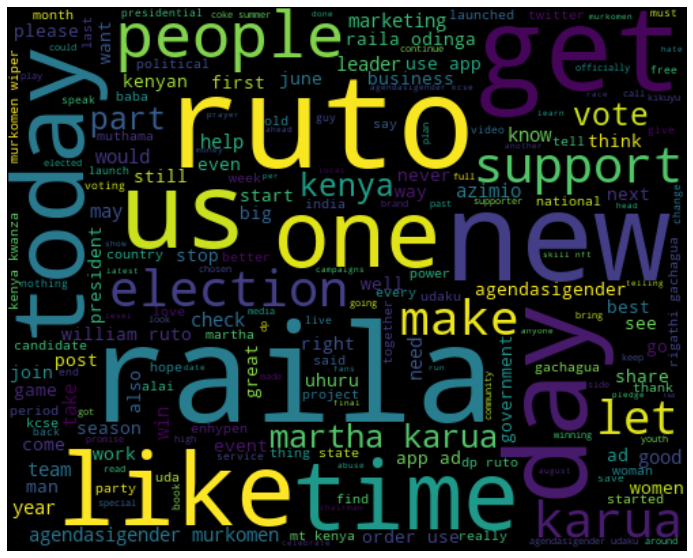

In [20]:
# Plot a word cloud

all_words = ' '.join( [data for data in df['tweet_text']])
word_cloud = WordCloud(width=500, height=400, random_state=21, max_font_size = 100,
                       stopwords=stopwords).generate(all_words)

plt.figure(figsize = (20,10))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Refining your Twitter API search query

In [21]:
search_words = "campaign OR raila OR ruto OR gachagua OR karua"

# Latitude, logitude and search radius(km) for Zambia and some surrounding regions
loc = "1.2921,36.8219,1000km"

# Search dates
date_since = "2022-05-21"
date_until = "2022-05-26"

# We also want to exclude retweets and replies as this may sway results
my_search = search_words + " -filter:retweets" + " -filter:replies"  

In [22]:
# Use the tweepy Cursor method to access tweets from a specified region and between certain dates
tweets = tw.Cursor(api.search,
                       q=my_search,
                       lang="en",
                       tweet_mode='extended',
                       geocode=loc,
                       since=date_since,
                       until=date_until).items(1000)

In [23]:
# Once again, this should take ~2 minutes to run if you are collecting 1000 tweets
tweet_info = [[tweet.id_str,tweet.created_at,tweet.user.location,tweet.full_text] for tweet in tweets]

# Put our data into a dataframe 
df_new = pd.DataFrame(data=tweet_info, columns=['tweet_id_str','date_time','location','tweet_text'])

# Have a quick look at the dataframe
df_new

,tweet_id_str,date_time,location,tweet_text
0,1529612798241959943,2022-05-25 23:58:04,Kenya,Water melon for Ksh18.00 @ kg in Bura tana. Dm...
1,1529611602487611393,2022-05-25 23:53:19,Kenya,Dennis Itumbi abduction - Angry Rigathi Gachag...
2,1529611298098618368,2022-05-25 23:52:06,Ethiopia,The Amhara regional state government has engag...
3,1529610866014007296,2022-05-25 23:50:23,Kenya,LIVE | DP William Ruto in Mombasa https://t.co...
4,1529610794933305345,2022-05-25 23:50:06,Kenya,"pigs for Ksh6,000.00 @ piglet in Nakuru. high ..."
...,...,...,...,...
995,1529447378809503744,2022-05-25 13:00:45,Kenya,DP Ruto picks Mathira MP Rigathi Gachagua as h...
996,1529447328318464001,2022-05-25 13:00:33,Tanzania,DO YOU LIKE DISCOUNTS? Get more for less by us...
997,1529447261117239302,2022-05-25 13:00:17,"Nairobi, Kenya","Launching in June 2022, the #AfricanFutures ca..."
998,1529447243270475777,2022-05-25 13:00:13,Kitui,"Raila Should ""Boss"" About Coast Land Grabbing ..."


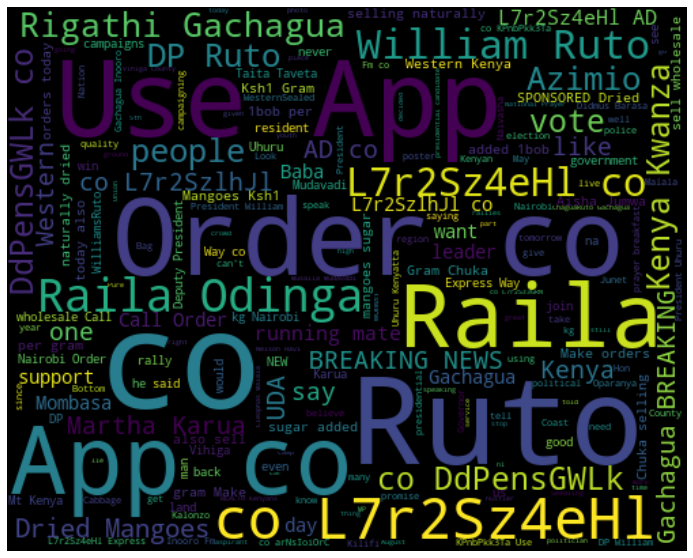

In [24]:
all_words = ' '.join( [data for data in df_new['tweet_text']])
word_cloud = WordCloud(width=500, height=400, random_state=21, max_font_size = 100,
                       stopwords=stopwords).generate(all_words)

plt.figure(figsize = (20,10))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [25]:
from google.colab import files
df_new .to_csv('df.csv')
files.download('df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [26]:
plt.savefig('word_cloud.png')

<Figure size 432x288 with 0 Axes>